# Libraries

In [1]:
import pandas as pd
import numpy as np

# Reading and adding label


In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake["Label"] = 1
true["Label"] = 0

# Combining 

In [3]:
frames = [fake, true]
news_dataset= pd.concat(frames)


# Shuffling data

In [4]:
news_dataset = news_dataset .sample(frac = 1)
news_dataset.head()

,title,text,subject,date,Label
13221,Britain's Davis says vital that Brexit talks p...,LONDON (Reuters) - Britain s Brexit minister D...,worldnews,"December 4, 2017",0
8585,Federal judge strikes down parts of Wisconsin ...,(Reuters) - A federal judge on Friday struck d...,politicsNews,"July 29, 2016",0
19900,OUCH! WATCH: Sneaky Liberal Gets Electrocuted ...,"Punishment is not for revenge, but to lessen ...",left-news,"Sep 29, 2016",1
13014,NOT-SO-SLICK WILLY: Bill Clinton Tries To Joke...,,politics,"Sep 14, 2016",1
7183,This Girl’s Hilarious Reaction While Watching...,"For the last nine or so months, we ve all had ...",News,"March 31, 2016",1


# Merging the title and the text 

In [5]:
news_dataset['content'] = news_dataset['text']+' '+news_dataset['title']

In [6]:
print(news_dataset['content'])

13221    LONDON (Reuters) - Britain s Brexit minister D...
8585     (Reuters) - A federal judge on Friday struck d...
19900     Punishment is not for revenge, but to lessen ...
13014      NOT-SO-SLICK WILLY: Bill Clinton Tries To Jo...
7183     For the last nine or so months, we ve all had ...
                               ...                        
3300     Republicans say Trump won because of the  econ...
15066    DAR ES SALAAM (Reuters) - Two East African pre...
12262    BOGOTA (Reuters) - Colombia s government is ur...
71       Senator John McCain (R-AZ) was treated at Walt...
13387    Hey Democrats If you can t even host a 4-day c...
Name: content, Length: 44898, dtype: object


# Pre-Processing

In [7]:
import re 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

In [8]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
port_stem = PorterStemmer()

In [11]:
def stemming(content):
    strmmed_content = re.sub('[^a-zA-Z]',' ',content)
    strmmed_content = strmmed_content.lower()
    strmmed_content = strmmed_content.split()
    strmmed_content = [port_stem.stem(word) for word in  strmmed_content   if not word in stopwords.words('english')]
    strmmed_content  = ' '.join( strmmed_content )
    return  strmmed_content

In [12]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [13]:
print(news_dataset['content'])

13221    london reuter britain brexit minist david davi...
8585     reuter feder judg friday struck string wiscons...
19900    punish reveng lessen crime reform crimin eliza...
13014    slick willi bill clinton tri joke around hilla...
7183     last nine month wit donald trump tri foray liv...
                               ...                        
3300     republican say trump econom anxieti republican...
15066    dar es salaam reuter two east african presid s...
12262    bogota reuter colombia govern urgent work cong...
71       senat john mccain r az treat walter reed medic...
13387    hey democrat even host day convent parti ask a...
Name: content, Length: 44898, dtype: object


In [14]:
X = news_dataset['content']
Y = news_dataset['Label']

In [15]:
print(X)

13221    london reuter britain brexit minist david davi...
8585     reuter feder judg friday struck string wiscons...
19900    punish reveng lessen crime reform crimin eliza...
13014    slick willi bill clinton tri joke around hilla...
7183     last nine month wit donald trump tri foray liv...
                               ...                        
3300     republican say trump econom anxieti republican...
15066    dar es salaam reuter two east african presid s...
12262    bogota reuter colombia govern urgent work cong...
71       senat john mccain r az treat walter reed medic...
13387    hey democrat even host day convent parti ask a...
Name: content, Length: 44898, dtype: object


In [16]:
print(Y)

13221    0
8585     0
19900    1
13014    1
7183     1
        ..
3300     1
15066    0
12262    0
71       1
13387    1
Name: Label, Length: 44898, dtype: int64


# Data Transformation 

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn import metrics
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns

##   - TfidfVectorizer()

In [19]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
x = vectorizer.transform(X)

In [20]:
print(x)

  (0, 81032)	0.09939276814727736
  (0, 78392)	0.06845262389658226
  (0, 77773)	0.06035246530681275
  (0, 73662)	0.03618750083368243
  (0, 72771)	0.06857138984654965
  (0, 67894)	0.2554109226429979
  (0, 67558)	0.08339979036956004
  (0, 66592)	0.09845122638580384
  (0, 65239)	0.03662476248201096
  (0, 64512)	0.10373519951660404
  (0, 63889)	0.14853056859552607
  (0, 61697)	0.20704146998861003
  (0, 57336)	0.11005912234879481
  (0, 55631)	0.20390797405281344
  (0, 55473)	0.09650303622942848
  (0, 54453)	0.2136082883962285
  (0, 53485)	0.06084303797434385
  (0, 53254)	0.08562924750387522
  (0, 49701)	0.06423798681931844
  (0, 48705)	0.055484642634975524
  (0, 48496)	0.06034049485667947
  (0, 48356)	0.15611802135028732
  (0, 44497)	0.07794888228918269
  (0, 44267)	0.08379018650146644
  (0, 43046)	0.07789403189216049
  :	:
  (44897, 9722)	0.06927038975917887
  (44897, 8251)	0.0384530568460926
  (44897, 8126)	0.03658423056550988
  (44897, 7214)	0.033747534341546995
  (44897, 6317)	0.06417265

In [21]:
print(Y)

1638     0
3787     0
2977     1
5270     0
8413     0
        ..
13022    0
18652    0
4671     0
9284     1
10728    0
Name: Label, Length: 44898, dtype: int64


In [22]:
x.shape

(44898, 89868)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, stratify=Y, random_state=2)

### Logistic Regression 

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train, Y_train)

LogisticRegression()

In [26]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [27]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9863028953229399


In [28]:
print('Precision = ', precision_score(X_test_prediction, Y_test))
print('Recall = ', recall_score(X_test_prediction, Y_test))
print('f1_score = ', f1_score(X_test_prediction, Y_test))

Precision =  0.9844548551959114
Recall =  0.9893002353948213
f1_score =  0.9868715978226064


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

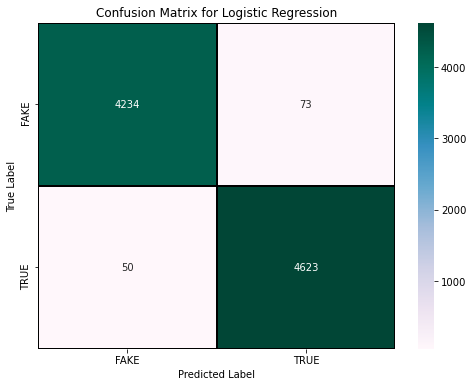

In [29]:
cm = confusion_matrix(X_test_prediction, Y_test)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "PuBuGn", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')

In [30]:
pred_prob1 = model.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr1, p_tpr1, _ = roc_curve(Y_test, random_probs, pos_label=1)

In [31]:
# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
print(auc_score1)

0.9987042233134026


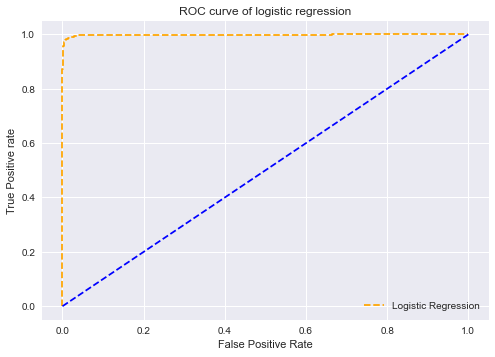

In [32]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr1, p_tpr1, linestyle='--', color='blue')
# title
plt.title('ROC curve of logistic regression')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

### Random Forest

In [33]:
clf=RandomForestClassifier(n_estimators=100)

In [34]:
clf.fit(X_train, Y_train)
y_predection=clf.predict(X_test)
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_predection))

Accuracy score of the test data :  0.9929844097995546


In [35]:
print('Precision = ', precision_score(y_predection, Y_test))
print('Recall = ', recall_score(y_predection, Y_test))
print('f1_score = ', f1_score(y_predection, Y_test))

Precision =  0.99190800681431
Recall =  0.9946615417467436
f1_score =  0.9932828659771831


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

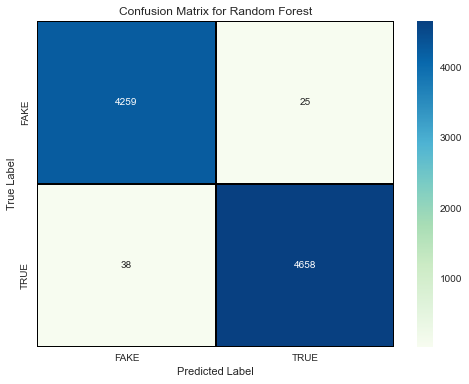

In [36]:
cm = confusion_matrix(Y_test,y_predection)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "GnBu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')

In [37]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr2, p_tpr2, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob2 = clf.predict_proba(X_test)
fpr2, tpr2, thresh1 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
# auc scores
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])
print(auc_score2)

0.9997224081284984


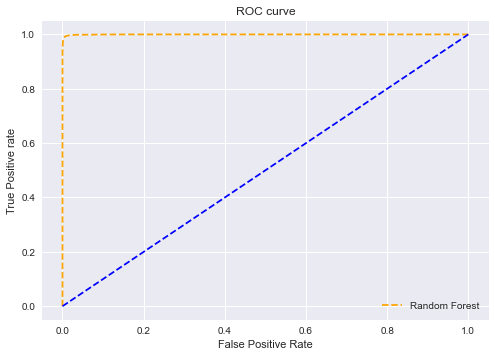

In [38]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr2, p_tpr2, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show();

### XGBOOST

In [39]:
xgb = XGBClassifier()

In [40]:
tfidf = xgb.fit(X_train,Y_train)

C:\Users\ASUS1\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:38:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
tfidf_val_predict = tfidf.predict( X_test)
print('Accuracy score of the test data : ',accuracy_score(Y_test, tfidf_val_predict))

Accuracy score of the test data :  0.9975501113585746


In [42]:
print('Precision = ', precision_score(tfidf_val_predict, Y_test))
print('Recall = ', recall_score(tfidf_val_predict, Y_test))
print('f1_score = ', f1_score(tfidf_val_predict, Y_test))

Precision =  0.9972316865417377
Recall =  0.9980818414322251
f1_score =  0.9976565828717513


Text(0.5, 1.0, 'Confusion Matrix for Xgboost')

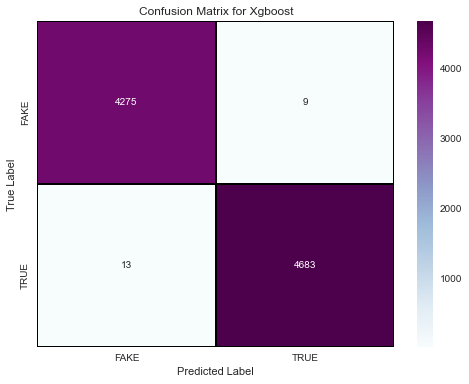

In [43]:
cm = confusion_matrix(Y_test, tfidf_val_predict)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "BuPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Xgboost')


In [44]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr3, p_tpr3, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob3 = xgb.predict_proba(X_test)
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)
# auc scores
auc_score3 = roc_auc_score(Y_test, pred_prob3[:,1])
print(auc_score3)

0.9997630689129713


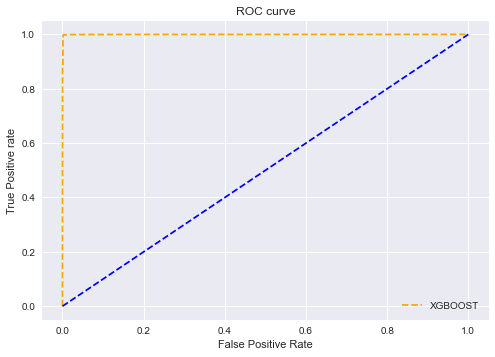

In [45]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr3, tpr3, linestyle='--',color='orange', label='XGBOOST')

plt.plot(p_fpr3, p_tpr3, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### SVM

In [46]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [47]:
y_pred2 = clf.predict(X_test)
SVM=metrics.accuracy_score(Y_test, y_pred2)
print(accuracy_score(Y_test,y_pred2))

0.9925389755011136


In [48]:
print('Accuracy score of the test data : ',accuracy_score(Y_test,y_pred2))

Accuracy score of the test data :  0.9925389755011136


In [49]:
print('Precision = ', precision_score(y_pred2, Y_test))
print('Recall = ', recall_score(y_pred2, Y_test))
print('f1_score = ', f1_score(y_pred2, Y_test))

Precision =  0.9908432708688245
Recall =  0.994868505452213
f1_score =  0.9928518083857889


Text(0.5, 1.0, 'Confusion Matrix for SVM')

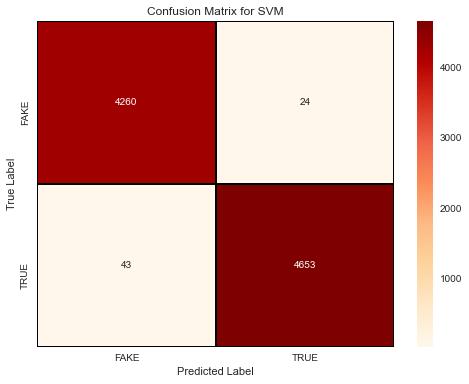

In [50]:
cm = confusion_matrix(Y_test,y_pred2)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "OrRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')

In [51]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr4, p_tpr4, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob4 = clf.predict_proba(X_test)


fpr4, tpr4, thresh4 = roc_curve(Y_test, pred_prob4[:,1], pos_label=1)
# auc scores
auc_score4 = roc_auc_score(Y_test, pred_prob4[:,1])
print(auc_score4)


0.9996006991666626


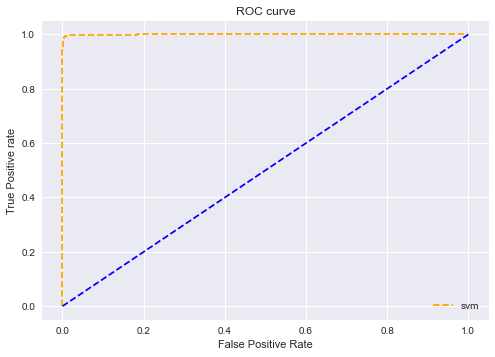

In [52]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr4, tpr4, linestyle='--',color='orange', label='svm')
plt.plot(p_fpr4, p_tpr4, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### Naive Bayes

In [53]:
nb = MultinomialNB()

In [54]:
nb.fit(X_train, Y_train)

MultinomialNB()

In [55]:
predictions = nb.predict(X_test)

In [56]:
print('Accuracy score of the test data : ',accuracy_score(Y_test,predictions))

Accuracy score of the test data :  0.9329621380846325


In [57]:
print('Precision = ', precision_score(predictions, Y_test))
print('Recall = ', recall_score(predictions, Y_test))
print('f1_score = ', f1_score(predictions, Y_test))

Precision =  0.9493185689948893
Recall =  0.9245126503525508
f1_score =  0.9367514183652028


Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes')

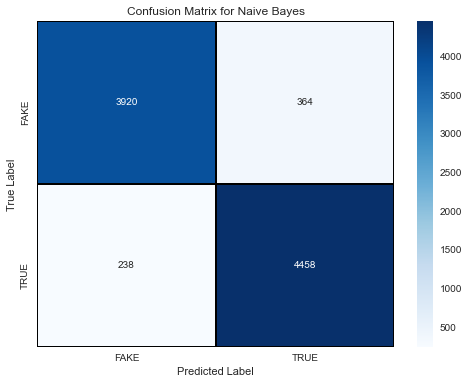

In [58]:
cm = confusion_matrix(Y_test, predictions)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes')


In [59]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr5, p_tpr5, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob5 = nb.predict_proba(X_test)
fpr5, tpr5, thresh5 = roc_curve(Y_test, pred_prob5[:,1], pos_label=1)
# auc scores
auc_score5 = roc_auc_score(Y_test, pred_prob5[:,1])
print(auc_score5)

0.9808121360412422


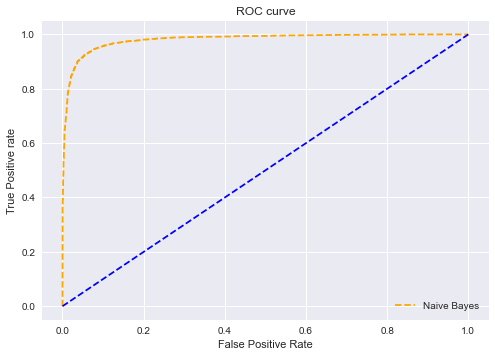

In [60]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr5, tpr5, linestyle='--',color='orange', label='Naive Bayes')

plt.plot(p_fpr5, p_tpr5, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### ADABOOST

In [61]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [62]:
model = abc.fit(X_train, Y_train)


In [63]:
y_pred4 = model.predict(X_test)

In [64]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred4))

Accuracy score of the test data :  0.9951002227171493


In [65]:
print('Precision = ', precision_score(y_pred4, Y_test))
print('Recall = ', recall_score(y_pred4, Y_test))
print('f1_score = ', f1_score(y_pred4, Y_test))

Precision =  0.9942504258943782
Recall =  0.9963721724285105
f1_score =  0.995310168407589


Text(0.5, 1.0, 'Confusion Matrix for AdaBoost ')

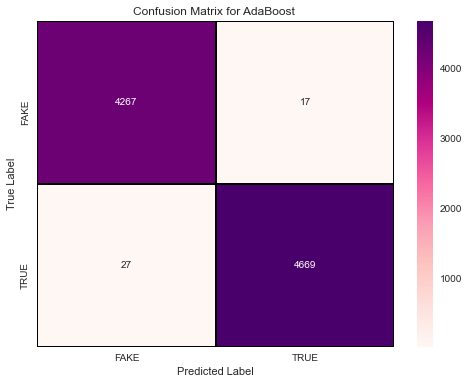

In [66]:
cm = confusion_matrix(Y_test,y_pred4)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "RdPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost ')

In [67]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr6, p_tpr6, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob6 = abc.predict_proba(X_test)

fpr6, tpr6, thresh6 = roc_curve(Y_test, pred_prob6[:,1], pos_label=1)
# auc scores
auc_score6 = roc_auc_score(Y_test, pred_prob6[:,1])
print(auc_score6)

0.9997498218481032


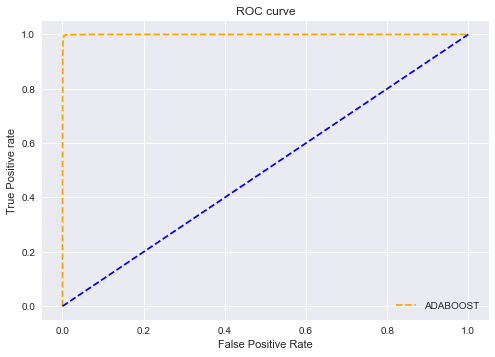

In [68]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='ADABOOST')
plt.plot(p_fpr6, p_tpr6, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### Decision Tree

In [69]:
dt = DecisionTreeClassifier()

In [70]:
dt = dt.fit(X_train,Y_train)

In [71]:
y_pred5 = dt.predict(X_test)

In [72]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred5))

Accuracy score of the test data :  0.9966592427616926


In [73]:
print('Precision = ', precision_score(y_pred5, Y_test))
print('Recall = ', recall_score(y_pred5, Y_test))
print('f1_score = ', f1_score(y_pred5, Y_test))

Precision =  0.9974446337308348
Recall =  0.9961718417694598
f1_score =  0.9968078314535008


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree ')

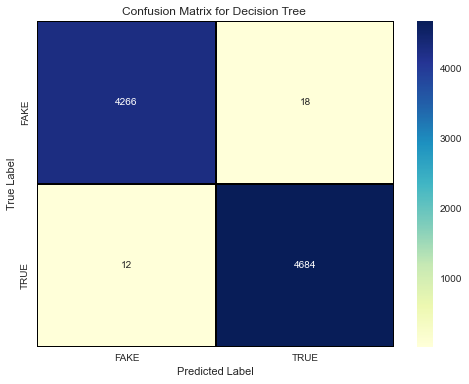

In [74]:
cm = confusion_matrix(Y_test,y_pred5)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "YlGnBu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree ')

In [75]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr7, p_tpr7, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob7 = dt.predict_proba(X_test)

fpr7, tpr7, thresh7 = roc_curve(Y_test, pred_prob7[:,1], pos_label=1)
# auc scores
auc_score7 = roc_auc_score(Y_test, pred_prob7[:,1])
print(auc_score7)

0.9966214765292829


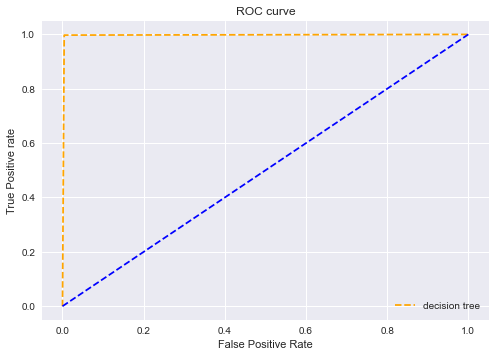

In [76]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr7, tpr7, linestyle='--',color='orange', label='decision tree')

plt.plot(p_fpr7, p_tpr7, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc  of decision tree ',dpi=300)
plt.show();

 ### kNN

In [77]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [78]:
y_pred6 = classifier.predict(X_test)

In [79]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred6))

Accuracy score of the test data :  0.8730512249443207


In [80]:
print('Precision = ', precision_score(y_pred6, Y_test))
print('Recall = ', recall_score(y_pred6, Y_test))
print('f1_score = ', f1_score(y_pred6, Y_test))

Precision =  0.8172913117546848
Recall =  0.9315533980582524
f1_score =  0.8706896551724137


Text(0.5, 1.0, 'Confusion Matrix for KNN ')

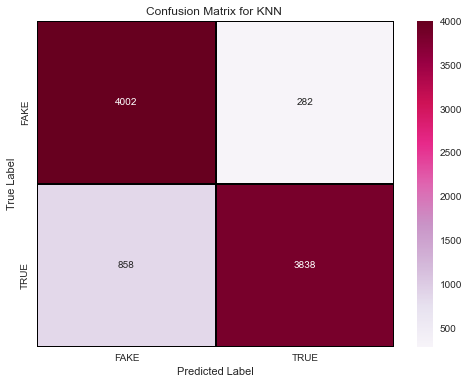

In [81]:
cm = confusion_matrix(Y_test,y_pred6)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "PuRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN ')

In [82]:
pred_prob9 = classifier.predict_proba(X_test)

fpr9, tpr9, thresh9 = roc_curve(Y_test, pred_prob9[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr9, p_tpr9, _ = roc_curve(Y_test, random_probs, pos_label=1)
# auc scores
auc_score9 = roc_auc_score(Y_test, pred_prob9[:,1])
print(auc_score9)

0.9497135452704648


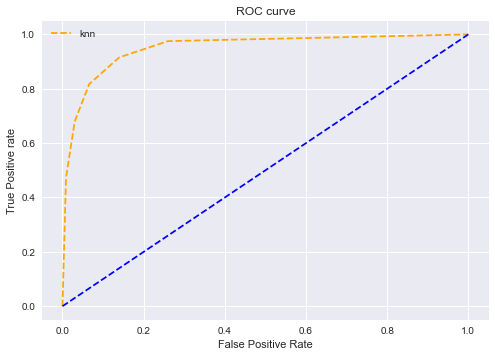

In [83]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr9, tpr9, linestyle='--',color='orange', label='knn')

plt.plot(p_fpr9, p_tpr9, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc of knn ',dpi=300)
plt.show();

#### A Comparison of Algorithms with TfidfVectorizer()

In [84]:
pip install PrettyTable

In [85]:
Logistic_Regression =roc_auc_score(Y_test, X_test_prediction)
Random_Forest =roc_auc_score(Y_test, y_predection)
XGBOOST =roc_auc_score(Y_test, tfidf_val_predict)
SVM =roc_auc_score(Y_test, y_pred2)
Naive_Bayes =roc_auc_score(Y_test, predictions)
ADABOOST =roc_auc_score(Y_test, y_pred4)
Dt =roc_auc_score(Y_test, y_pred5)
knn= roc_auc_score(Y_test,y_pred6)

In [86]:
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]
x.add_row(["Logistic_Regression Algorithm", round(Logistic_Regression,4)])
x.add_row(["Random_Forest Algorithm", round(Random_Forest,4)])
x.add_row(["XGBOOST Algorithm", round(XGBOOST,4)])
x.add_row(["SVM Algorithm", round(SVM,4)])
x.add_row(["Naive_Bayes Algorithm ", round(Naive_Bayes,4)])
x.add_row(["ADABOOST Algorithm", round(ADABOOST,4)])
x.add_row(["Dt Algorithm", round(Dt,4)])
x.add_row(["knn Algorithm", round(knn,4)])

print(x)
print('\n')



Comparison of all algorithm results
+-------------------------------+----------+
|             Model             | Accuracy |
+-------------------------------+----------+
| Logistic_Regression Algorithm |  0.9864  |
|    Random_Forest Algorithm    |  0.993   |
|       XGBOOST Algorithm       |  0.9976  |
|         SVM Algorithm         |  0.9926  |
|     Naive_Bayes Algorithm     |  0.9322  |
|       ADABOOST Algorithm      |  0.9951  |
|          Dt Algorithm         |  0.9966  |
|         knn Algorithm         |  0.8757  |
+-------------------------------+----------+




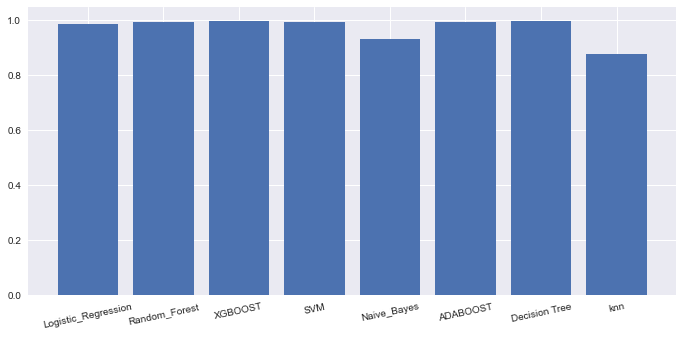

In [87]:
fig = plt.figure(figsize=(9,4))
ax = fig.add_axes([0,0,1,1])
models = ['Logistic_Regression', 'Random_Forest', 'XGBOOST', 'SVM', 'Naive_Bayes', 'ADABOOST', 'Decision Tree', 'knn']
acc = [Logistic_Regression, Random_Forest , XGBOOST,  SVM , Naive_Bayes,ADABOOST ,Dt , knn]
plt.xticks(rotation=12)
ax.bar(models,acc)
plt.show()

In [88]:
# calculate ROC curves
lgr_fpr, lgr_tpr, _ = roc_curve(Y_test, X_test_prediction)
rdf_fpr, rdf_tpr, _ = roc_curve(Y_test, y_predection)
xgb_fpr, xgb_tpr, _ = roc_curve(Y_test, tfidf_val_predict)
svm_fpr, svm_tpr, _ = roc_curve(Y_test, y_pred2)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, predictions)
ada_fpr, ada_tpr, _ = roc_curve(Y_test, y_pred4)
dt_fpr, dt_tpr, _ = roc_curve(Y_test, y_pred5)
knn_fpr, knn_tpr, _ = roc_curve(Y_test,y_pred6)

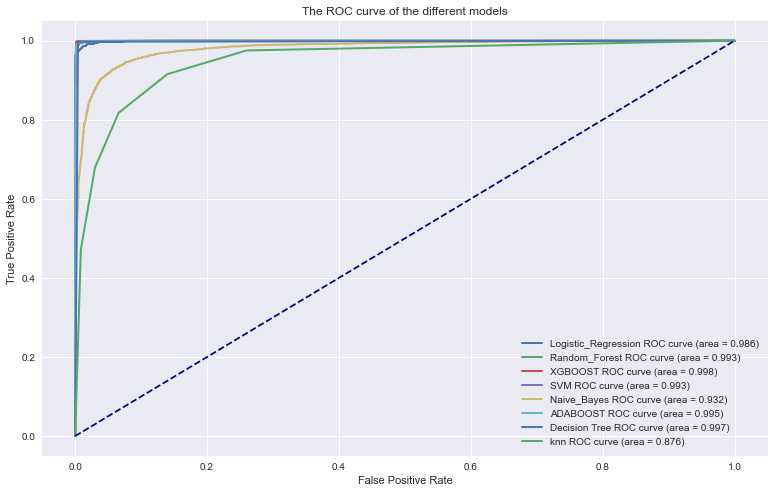

In [89]:
lw =2
plt.figure(figsize = (13,8))
plt.plot(fpr1, tpr1, lw = lw, label='Logistic_Regression ROC curve (area = %0.3f)' % Logistic_Regression)
plt.plot(fpr2, tpr2, lw = lw, label='Random_Forest ROC curve (area = %0.3f)' % Random_Forest)
plt.plot(fpr3, tpr3,  lw = lw, label='XGBOOST ROC curve (area = %0.3f)' % XGBOOST)
plt.plot(fpr4, tpr4, lw=lw,  label='SVM ROC curve (area = %0.3f)' % SVM)
plt.plot(fpr5, tpr5,  lw = lw, label='Naive_Bayes ROC curve (area = %0.3f)' % Naive_Bayes)
plt.plot(fpr6, tpr6,  lw = lw, label='ADABOOST ROC curve (area = %0.3f)' % ADABOOST)
plt.plot(fpr7, tpr7, lw=lw,  label='Decision Tree ROC curve (area = %0.3f)' % Dt)
plt.plot(fpr9, tpr9,  lw = lw, label='knn ROC curve (area = %0.3f)' % knn)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('The ROC curve of the different models')

plt.legend()
plt.show()

### - CountVectorizer()

In [90]:
count_vect = CountVectorizer()
x = count_vect.fit_transform(X)

In [91]:
print(x)

  (0, 10031)	1
  (0, 65239)	1
  (0, 23354)	7
  (0, 2501)	2
  (0, 63889)	2
  (0, 35766)	1
  (0, 1285)	1
  (0, 35227)	1
  (0, 21495)	1
  (0, 67894)	3
  (0, 54453)	3
  (0, 41651)	2
  (0, 28982)	1
  (0, 7403)	1
  (0, 43046)	1
  (0, 66592)	1
  (0, 81032)	1
  (0, 48356)	2
  (0, 55631)	4
  (0, 19261)	2
  (0, 67558)	3
  (0, 77773)	1
  (0, 78392)	1
  (0, 61697)	1
  (0, 48705)	1
  :	:
  (44897, 51396)	1
  (44897, 54957)	2
  (44897, 22725)	1
  (44897, 22434)	1
  (44897, 53672)	1
  (44897, 48925)	1
  (44897, 72770)	2
  (44897, 75365)	1
  (44897, 84180)	1
  (44897, 11746)	4
  (44897, 11913)	1
  (44897, 52451)	1
  (44897, 76761)	1
  (44897, 9821)	1
  (44897, 10324)	1
  (44897, 57768)	1
  (44897, 26255)	1
  (44897, 36481)	1
  (44897, 82699)	1
  (44897, 25406)	1
  (44897, 3032)	2
  (44897, 71870)	1
  (44897, 44432)	1
  (44897, 9722)	1
  (44897, 54198)	1


In [92]:
print(x.shape)

(44898, 89868)


In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, stratify=Y, random_state=2)

### Logistic Regression 

In [94]:
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\ASUS1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [96]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9956570155902005


In [97]:
print('Precision = ', precision_score(X_test_prediction, Y_test))
print('Recall = ', recall_score(X_test_prediction, Y_test))
print('f1_score = ', f1_score(X_test_prediction, Y_test))

Precision =  0.9955281090289608
Recall =  0.996164500319625
f1_score =  0.9958462030035148


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

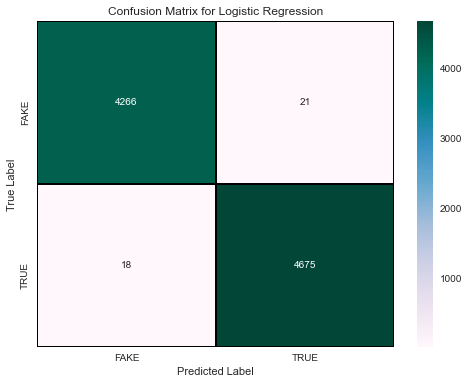

In [98]:
cm = confusion_matrix(X_test_prediction, Y_test)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "PuBuGn", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')


In [99]:
# logistic regression
model1 = LogisticRegression()
# fit model
model1.fit(X_train, Y_train)
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)

C:\Users\ASUS1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr1, p_tpr1, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
print(auc_score1)

0.9992846087895692


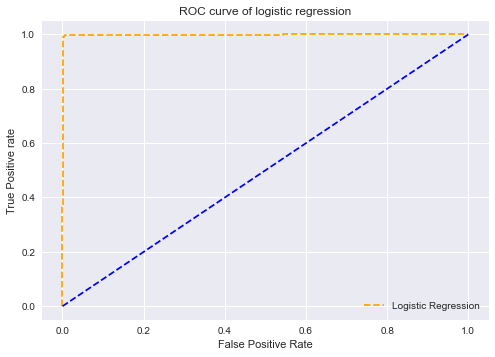

In [101]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr1, p_tpr1, linestyle='--', color='blue')
# title
plt.title('ROC curve of logistic regression')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

### Random Forest

In [102]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [103]:
y_predection=clf.predict(X_test)

In [104]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_predection))

Accuracy score of the test data :  0.9920935412026726


In [105]:
print('Precision = ', precision_score(y_predection, Y_test))
print('Recall = ', recall_score(y_predection, Y_test))
print('f1_score = ', f1_score(y_predection, Y_test))

Precision =  0.9910562180579217
Recall =  0.9938073884262225
f1_score =  0.9924298965774604


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

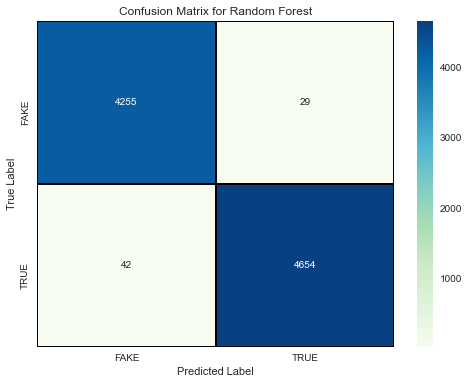

In [106]:
cm = confusion_matrix(Y_test,y_predection)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "GnBu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')

In [107]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr2, p_tpr2, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob2 = clf.predict_proba(X_test)

fpr2, tpr2, thresh1 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
# auc scores
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])
print(auc_score2)

0.9996772985173626


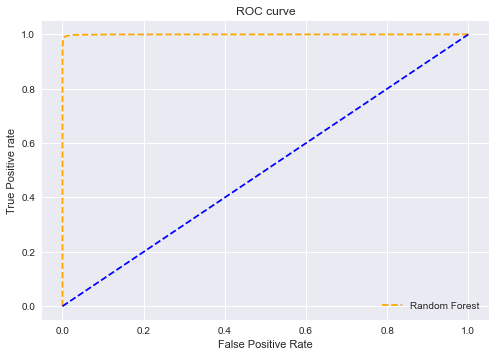

In [108]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr2, p_tpr2, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

### XGboost

In [109]:
xgb = XGBClassifier()
tfidf = xgb.fit(X_train,Y_train)

C:\Users\ASUS1\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [110]:
tfidf_val_predict = tfidf.predict( X_test)
print('Accuracy score of the test data : ',accuracy_score(Y_test, tfidf_val_predict))

Accuracy score of the test data :  0.9975501113585746


In [111]:
print('Precision = ', precision_score(tfidf_val_predict, Y_test))
print('Recall = ', recall_score(tfidf_val_predict, Y_test))
print('f1_score = ', f1_score(tfidf_val_predict, Y_test))

Precision =  0.9972316865417377
Recall =  0.9980818414322251
f1_score =  0.9976565828717513


Text(0.5, 1.0, 'Confusion Matrix for Xgboost')

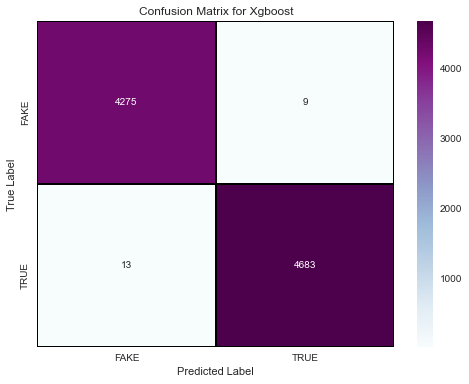

In [112]:
cm = confusion_matrix(Y_test, tfidf_val_predict)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "BuPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Xgboost')


In [113]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr3, p_tpr3, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob3 = xgb.predict_proba(X_test)

fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)
# auc scores
auc_score3 = roc_auc_score(Y_test, pred_prob3[:,1])
print(auc_score3)

0.9997295411634273


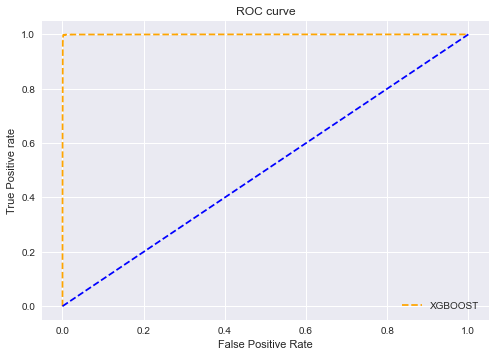

In [114]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr3, tpr3, linestyle='--',color='orange', label='XGBOOST')

plt.plot(p_fpr3, p_tpr3, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### SVM

In [115]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [116]:
y_pred2 = clf.predict(X_test)
SVM=metrics.accuracy_score(Y_test, y_pred2)

In [117]:
print('Accuracy score of the test data : ',accuracy_score(Y_test,y_pred2))

Accuracy score of the test data :  0.994988864142539


In [118]:
print('Precision = ', precision_score(y_pred2, Y_test))
print('Recall = ', recall_score(y_pred2, Y_test))
print('f1_score = ', f1_score(y_pred2, Y_test))

Precision =  0.9955281090289608
Recall =  0.9948925303256012
f1_score =  0.995210218201171


Text(0.5, 1.0, 'Confusion Matrix for SVM')

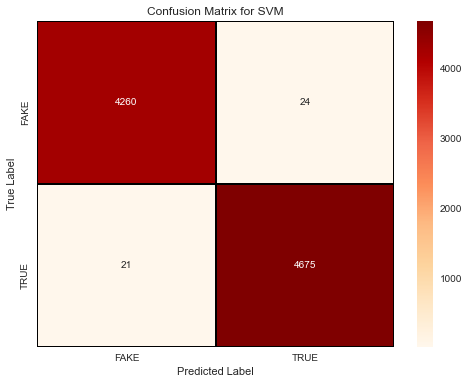

In [119]:
cm = confusion_matrix(Y_test,y_pred2)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "OrRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')


In [120]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr4, p_tpr4, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob4 = clf.predict_proba(X_test)

fpr4, tpr4, thresh4 = roc_curve(Y_test, pred_prob4[:,1], pos_label=1)
# auc scores
auc_score4 = roc_auc_score(Y_test, pred_prob4[:,1])
print(auc_score4)

0.9991171191645313


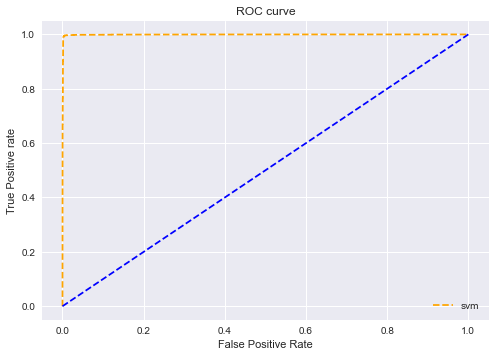

In [121]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr4, tpr4, linestyle='--',color='orange', label='svm')
plt.plot(p_fpr4, p_tpr4, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### Naive Bayes

In [122]:
nb = MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB()

In [123]:
predictions = nb.predict(X_test)
print('Accuracy score of the test data : ',accuracy_score(Y_test,predictions))

Accuracy score of the test data :  0.9502227171492205


In [124]:
print('Precision = ', precision_score(predictions, Y_test))
print('Recall = ', recall_score(predictions, Y_test))
print('f1_score = ', f1_score(predictions, Y_test))

Precision =  0.9533645655877342
Recall =  0.9515409139213603
f1_score =  0.9524518668226785


Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes')

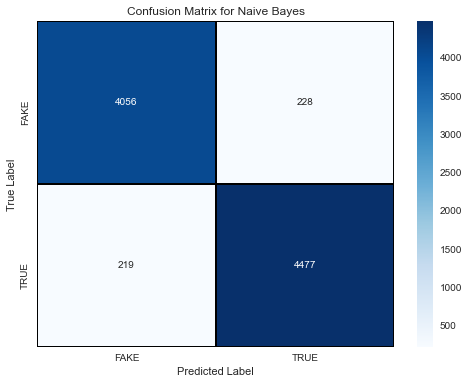

In [125]:
cm = confusion_matrix(Y_test, predictions)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes')


In [126]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr5, p_tpr5, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob5 = nb.predict_proba(X_test)

fpr5, tpr5, thresh5 = roc_curve(Y_test, pred_prob5[:,1], pos_label=1)
# auc scores
auc_score5 = roc_auc_score(Y_test, pred_prob5[:,1])
print(auc_score5)


0.9749160737548852


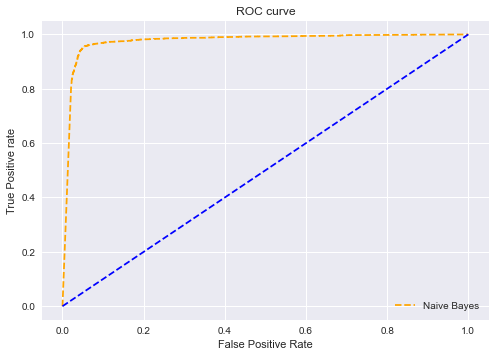

In [127]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr5, tpr5, linestyle='--',color='orange', label='Naive Bayes')

plt.plot(p_fpr5, p_tpr5, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### ADAboost

In [128]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [129]:
model = abc.fit(X_train, Y_train)
y_pred4 = model.predict(X_test)
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred4))

Accuracy score of the test data :  0.9956570155902005


In [130]:
print('Precision = ', precision_score(y_pred4, Y_test))
print('Recall = ', recall_score(y_pred4, Y_test))
print('f1_score = ', f1_score(y_pred4, Y_test))

Precision =  0.9946763202725724
Recall =  0.9970117395944503
f1_score =  0.9958426606971537


Text(0.5, 1.0, 'Confusion Matrix for AdaBoost ')

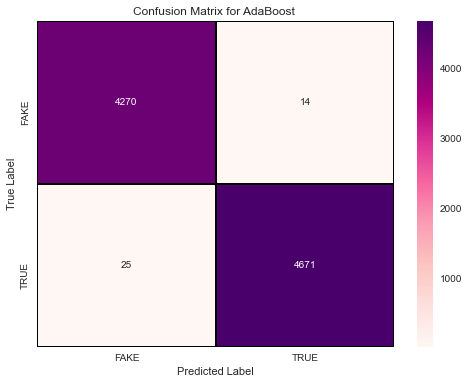

In [131]:
cm = confusion_matrix(Y_test,y_pred4)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "RdPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost ')


In [132]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr6, p_tpr6, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob6 = abc.predict_proba(X_test)

fpr6, tpr6, thresh6 = roc_curve(Y_test, pred_prob6[:,1], pos_label=1)
# auc scores
auc_score6 = roc_auc_score(Y_test, pred_prob6[:,1])
print(auc_score6)

0.999714504626382


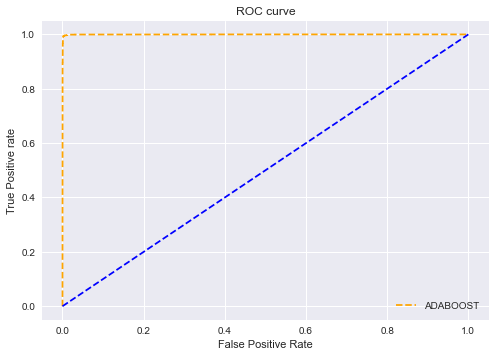

In [133]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='ADABOOST')
plt.plot(p_fpr6, p_tpr6, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### Decision Tree

In [134]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,Y_train)
y_pred5 = dt.predict(X_test)

In [135]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred5))

Accuracy score of the test data :  0.9972160356347439


In [136]:
print('Precision = ', precision_score(y_pred5, Y_test))
print('Recall = ', recall_score(y_pred5, Y_test))
print('f1_score = ', f1_score(y_pred5, Y_test))

Precision =  0.9970187393526405
Recall =  0.9976560835286598
f1_score =  0.9973373096176377


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree ')

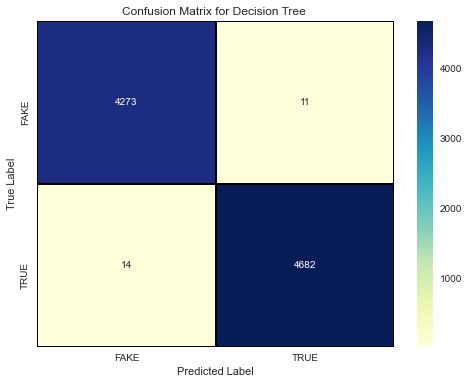

In [137]:
cm = confusion_matrix(Y_test,y_pred5)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "YlGnBu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree ')

In [138]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr7, p_tpr7, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob7 = dt.predict_proba(X_test)

fpr7, tpr7, thresh7 = roc_curve(Y_test, pred_prob7[:,1], pos_label=1)
# auc scores
auc_score7 = roc_auc_score(Y_test, pred_prob7[:,1])
print(auc_score7)

0.9972255228042382


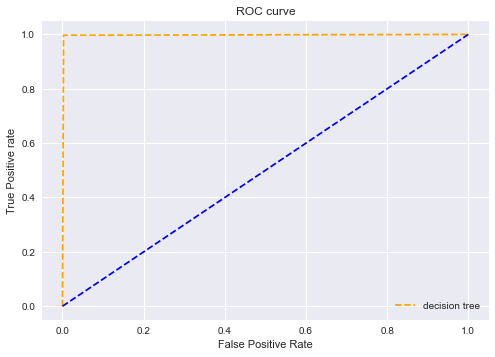

In [139]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr7, tpr7, linestyle='--',color='orange', label='decision tree')

plt.plot(p_fpr7, p_tpr7, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### KNN

In [140]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, Y_train)
y_pred6 = classifier.predict(X_test)

In [141]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred6))

Accuracy score of the test data :  0.7873051224944321


In [142]:
print('Precision = ', precision_score(y_pred6, Y_test))
print('Recall = ', recall_score(y_pred6, Y_test))
print('f1_score = ', f1_score(y_pred6, Y_test))

Precision =  0.8100511073253833
Recall =  0.7888842803815844
f1_score =  0.7993275898297961


Text(0.5, 1.0, 'Confusion Matrix for KNN ')

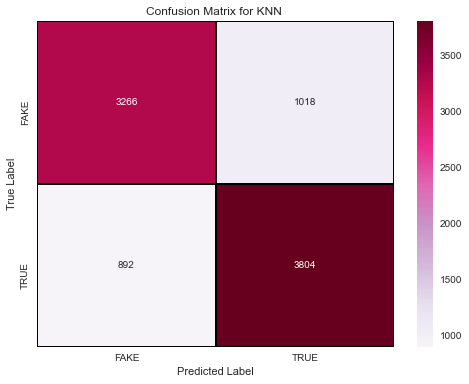

In [143]:
cm = confusion_matrix(Y_test,y_pred6)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "PuRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN ')


In [144]:
pred_prob9 = classifier.predict_proba(X_test)
fpr9, tpr9, thresh9 = roc_curve(Y_test, pred_prob9[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr9, p_tpr9, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
auc_score9 = roc_auc_score(Y_test, pred_prob9[:,1])
print(auc_score9)

0.8530941266341858


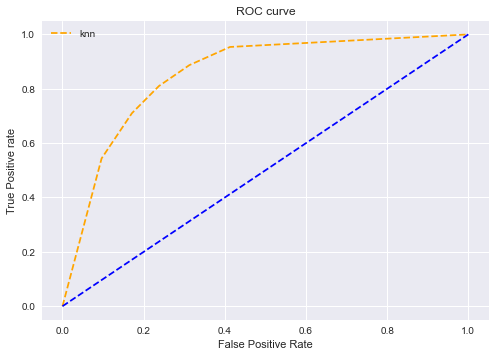

In [145]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr9, tpr9, linestyle='--',color='orange', label='knn')

plt.plot(p_fpr9, p_tpr9, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

#### A Comparison of Algorithms with CountVectorizer()

In [146]:
Logistic_Regression =roc_auc_score(Y_test, X_test_prediction)
Random_Forest =roc_auc_score(Y_test, y_predection)
XGBOOST =roc_auc_score(Y_test, tfidf_val_predict)
SVM =roc_auc_score(Y_test, y_pred2)
Naive_Bayes =roc_auc_score(Y_test, predictions)
ADABOOST =roc_auc_score(Y_test, y_pred4)
Dt =roc_auc_score(Y_test, y_pred5)
knn= roc_auc_score(Y_test,y_pred6)

In [147]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]
x.add_row(["Logistic_Regression Algorithm", round(Logistic_Regression,4)])
x.add_row(["Random_Forest Algorithm", round(Random_Forest,4)])
x.add_row(["XGBOOST Algorithm", round(XGBOOST,4)])
x.add_row(["SVM Algorithm", round(SVM,4)])
x.add_row(["Naive_Bayes Algorithm ", round(Naive_Bayes,4)])
x.add_row(["ADABOOST Algorithm", round(ADABOOST,4)])
x.add_row(["Dt Algorithm", round(Dt,4)])
x.add_row(["knn Algorithm", round(knn,4)])

print(x)
print('\n')



Comparison of all algorithm results
+-------------------------------+----------+
|             Model             | Accuracy |
+-------------------------------+----------+
| Logistic_Regression Algorithm |  0.9957  |
|    Random_Forest Algorithm    |  0.9921  |
|       XGBOOST Algorithm       |  0.9976  |
|         SVM Algorithm         |  0.995   |
|     Naive_Bayes Algorithm     |  0.9501  |
|       ADABOOST Algorithm      |  0.9957  |
|          Dt Algorithm         |  0.9972  |
|         knn Algorithm         |  0.7862  |
+-------------------------------+----------+




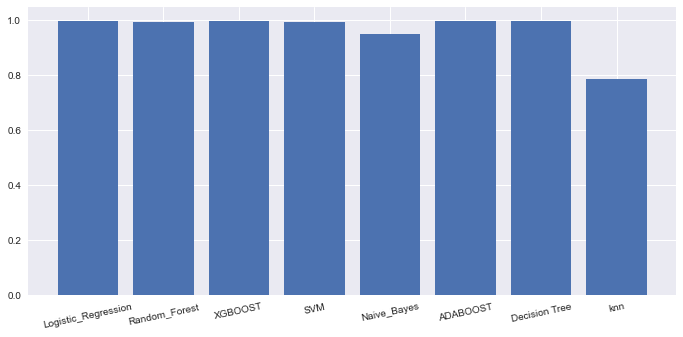

In [148]:
fig = plt.figure(figsize=(9,4))
ax = fig.add_axes([0,0,1,1])
models = ['Logistic_Regression', 'Random_Forest', 'XGBOOST', 'SVM', 'Naive_Bayes', 'ADABOOST', 'Decision Tree', 'knn']
acc = [Logistic_Regression, Random_Forest , XGBOOST,  SVM , Naive_Bayes,ADABOOST ,Dt , knn]
plt.xticks(rotation=12)
ax.bar(models,acc)
plt.show()

In [149]:
# calculate ROC curves
lgr_fpr, lgr_tpr, _ = roc_curve(Y_test, X_test_prediction)
rdf_fpr, rdf_tpr, _ = roc_curve(Y_test, y_predection)
xgb_fpr, xgb_tpr, _ = roc_curve(Y_test, tfidf_val_predict)
svm_fpr, svm_tpr, _ = roc_curve(Y_test, y_pred2)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, predictions)
ada_fpr, ada_tpr, _ = roc_curve(Y_test, y_pred4)
dt_fpr, dt_tpr, _ = roc_curve(Y_test, y_pred5)
knn_fpr, knn_tpr, _ = roc_curve(Y_test,y_pred6)

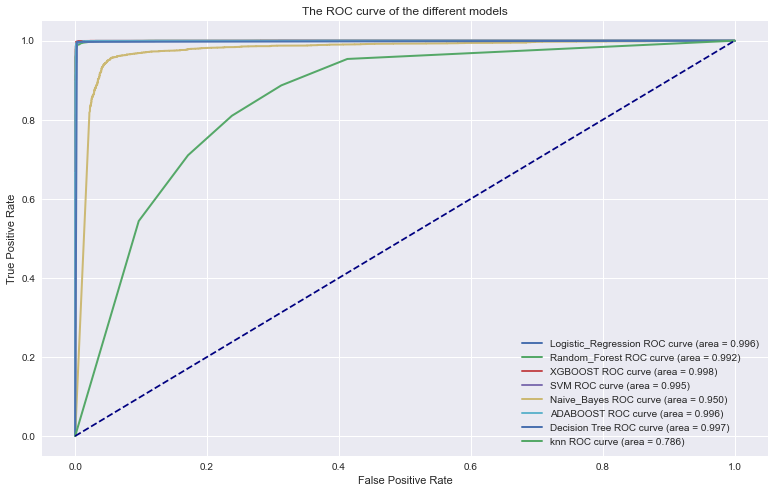

In [150]:
lw =2
plt.figure(figsize = (13,8))
plt.plot(fpr1, tpr1, lw = lw, label='Logistic_Regression ROC curve (area = %0.3f)' % Logistic_Regression)
plt.plot(fpr2, tpr2, lw = lw, label='Random_Forest ROC curve (area = %0.3f)' % Random_Forest)
plt.plot(fpr3, tpr3,  lw = lw, label='XGBOOST ROC curve (area = %0.3f)' % XGBOOST)
plt.plot(fpr4, tpr4, lw=lw,  label='SVM ROC curve (area = %0.3f)' % SVM)
plt.plot(fpr5, tpr5,  lw = lw, label='Naive_Bayes ROC curve (area = %0.3f)' % Naive_Bayes)
plt.plot(fpr6, tpr6,  lw = lw, label='ADABOOST ROC curve (area = %0.3f)' % ADABOOST)
plt.plot(fpr7, tpr7, lw=lw,  label='Decision Tree ROC curve (area = %0.3f)' % Dt)
plt.plot(fpr9, tpr9,  lw = lw, label='knn ROC curve (area = %0.3f)' % knn)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('The ROC curve of the different models')
plt.legend()
plt.show()

### - HashingVectorizer() 

In [151]:
X = np.array(news_dataset['content'])
vectorizer = HashingVectorizer()
vector = vectorizer.transform(X)
print(vector.shape)
print(vector.toarray())
#to dataframe
dft=pd.DataFrame.sparse.from_spmatrix(vector)

(44898, 1048576)


MemoryError: Unable to allocate 351. GiB for an array with shape (44898, 1048576) and data type float64

In [152]:
print(vector)

  (0, 6481)	-0.08032193289024989
  (0, 129653)	-0.32128773156099955
  (0, 173139)	0.08032193289024989
  (0, 180257)	-0.08032193289024989
  (0, 248864)	-0.16064386578049977
  (0, 253629)	-0.08032193289024989
  (0, 281412)	0.08032193289024989
  (0, 322376)	0.08032193289024989
  (0, 360502)	0.08032193289024989
  (0, 410366)	0.08032193289024989
  (0, 417195)	-0.08032193289024989
  (0, 421646)	-0.08032193289024989
  (0, 442446)	0.08032193289024989
  (0, 498320)	-0.08032193289024989
  (0, 518940)	-0.08032193289024989
  (0, 519569)	0.08032193289024989
  (0, 539336)	-0.08032193289024989
  (0, 551567)	0.08032193289024989
  (0, 558219)	-0.08032193289024989
  (0, 575224)	-0.08032193289024989
  (0, 580904)	-0.08032193289024989
  (0, 602500)	0.24096579867074966
  (0, 632278)	0.08032193289024989
  (0, 681351)	0.16064386578049977
  (0, 692857)	-0.08032193289024989
  :	:
  (44897, 942342)	-0.06204720485576976
  (44897, 943805)	0.03102360242788488
  (44897, 947234)	-0.03102360242788488
  (44897, 948532

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(vector, Y, test_size = 0.2, stratify=Y, random_state=2)

### Logistic Regression

In [154]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [155]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [156]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.989532293986637


In [157]:
print('Precision = ', precision_score(X_test_prediction, Y_test))
print('Recall = ', recall_score(X_test_prediction, Y_test))
print('f1_score = ', f1_score(X_test_prediction, Y_test))

Precision =  0.987862010221465
Recall =  0.992087254063302
f1_score =  0.9899701237729408


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

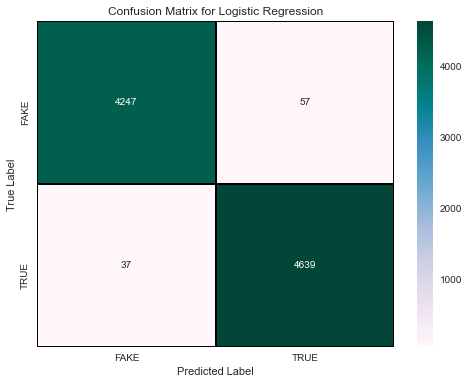

In [158]:
cm = confusion_matrix(X_test_prediction, Y_test)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "PuBuGn", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')


In [159]:
# logistic regression
model1 = LogisticRegression()
# fit model
model1.fit(X_train, Y_train)
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)

In [160]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr1, p_tpr1, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
print(auc_score1)


0.9990203633980566


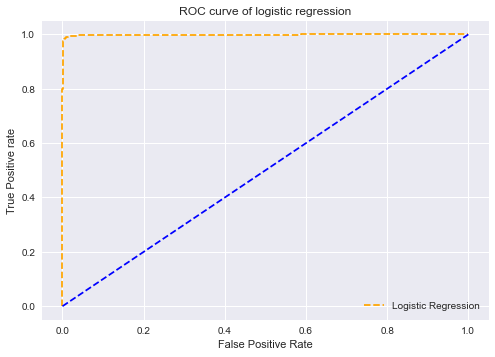

In [161]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr1, p_tpr1, linestyle='--', color='blue')
# title
plt.title('ROC curve of logistic regression')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

### Random Forest

In [162]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [163]:
y_predection=clf.predict(X_test)

In [164]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_predection))

Accuracy score of the test data :  0.9826280623608018


In [165]:
print('Precision = ', precision_score(y_predection, Y_test))
print('Recall = ', recall_score(y_predection, Y_test))
print('f1_score = ', f1_score(y_predection, Y_test))

Precision =  0.9825383304940375
Recall =  0.9842150170648464
f1_score =  0.9833759590792839


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

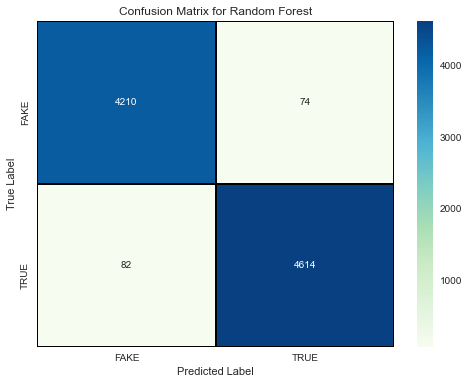

In [166]:
cm = confusion_matrix(Y_test,y_predection)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "GnBu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')


In [167]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr2, p_tpr2, _ = roc_curve(Y_test, random_probs, pos_label=1)


pred_prob2 = clf.predict_proba(X_test)

fpr2, tpr2, thresh1 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
# auc scores
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])
print(auc_score2)

0.9986527511345253


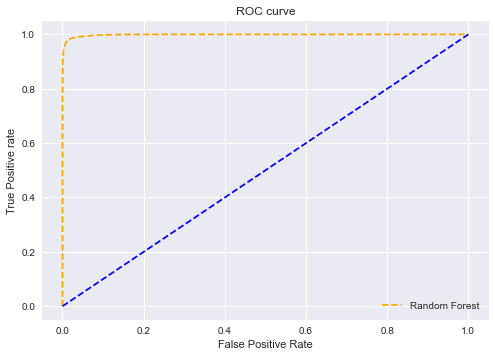

In [168]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr2, p_tpr2, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

### XGboost

In [169]:
xgb = XGBClassifier()
tfidf = xgb.fit(X_train,Y_train)

C:\Users\ASUS1\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [170]:
tfidf_val_predict = tfidf.predict( X_test)
print('Accuracy score of the test data : ',accuracy_score(Y_test, tfidf_val_predict))

Accuracy score of the test data :  0.9975501113585746


In [171]:
print('Precision = ', precision_score(tfidf_val_predict, Y_test))
print('Recall = ', recall_score(tfidf_val_predict, Y_test))
print('f1_score = ', f1_score(tfidf_val_predict, Y_test))

Precision =  0.9972316865417377
Recall =  0.9980818414322251
f1_score =  0.9976565828717513


Text(0.5, 1.0, 'Confusion Matrix for Xgboost')

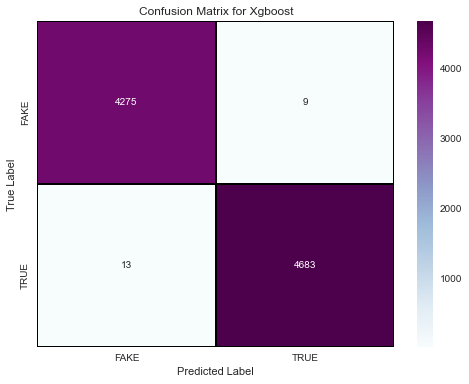

In [172]:
cm = confusion_matrix(Y_test, tfidf_val_predict)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "BuPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Xgboost')

In [173]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr3, p_tpr3, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob3 = xgb.predict_proba(X_test)

fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)
# auc scores
auc_score3 = roc_auc_score(Y_test, pred_prob3[:,1])
print(auc_score3)


0.9997983115733518


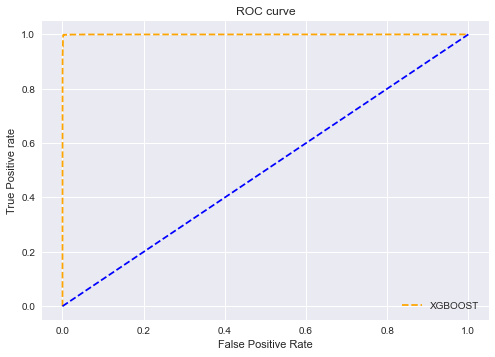

In [174]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr3, tpr3, linestyle='--',color='orange', label='XGBOOST')

plt.plot(p_fpr3, p_tpr3, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### SVM

In [175]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, Y_train)
y_pred2 = clf.predict(X_test)


In [176]:
print('Accuracy score of the test data : ',accuracy_score(Y_test,y_pred2))

Accuracy score of the test data :  0.994988864142539


In [177]:
print('Precision = ', precision_score(y_pred2, Y_test))
print('Recall = ', recall_score(y_pred2, Y_test))
print('f1_score = ', f1_score(y_pred2, Y_test))

Precision =  0.9933986371379898
Recall =  0.9970079076725796
f1_score =  0.9952000000000001


Text(0.5, 1.0, 'Confusion Matrix for SVM')

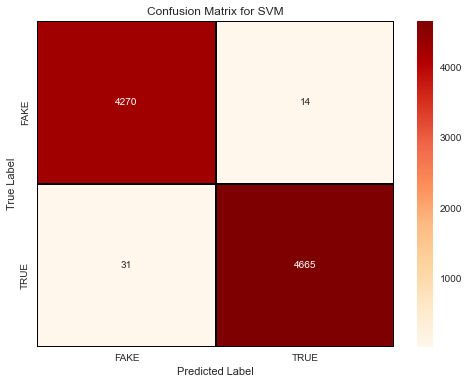

In [178]:
cm = confusion_matrix(Y_test,y_pred2)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "OrRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')

In [179]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr4, p_tpr4, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob4 = clf.predict_proba(X_test)

fpr4, tpr4, thresh4 = roc_curve(Y_test, pred_prob4[:,1], pos_label=1)
# auc scores
auc_score4 = roc_auc_score(Y_test, pred_prob4[:,1])
print(auc_score4)

0.9996416830502786


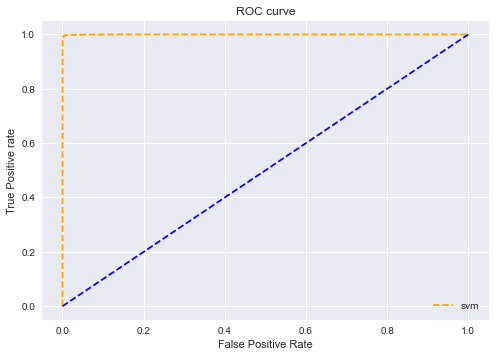

In [180]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr4, tpr4, linestyle='--',color='orange', label='svm')
plt.plot(p_fpr4, p_tpr4, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### ADAboost

In [181]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [182]:
model = abc.fit(X_train, Y_train)
y_pred4 = model.predict(X_test)

In [183]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred4))

Accuracy score of the test data :  0.99543429844098


In [184]:
print('Precision = ', precision_score(y_pred4, Y_test))
print('Recall = ', recall_score(y_pred4, Y_test))
print('f1_score = ', f1_score(y_pred4, Y_test))

Precision =  0.9944633730834753
Recall =  0.9967982924226254
f1_score =  0.9956294638098284


Text(0.5, 1.0, 'Confusion Matrix for AdaBoost ')

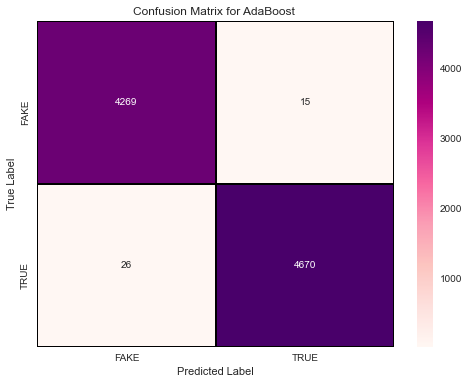

In [185]:
cm = confusion_matrix(Y_test,y_pred4)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "RdPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost ')

In [186]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr6, p_tpr6, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob6 = abc.predict_proba(X_test)

fpr6, tpr6, thresh6 = roc_curve(Y_test, pred_prob6[:,1], pos_label=1)
# auc scores
auc_score6 = roc_auc_score(Y_test, pred_prob6[:,1])
print(auc_score6)

0.9997667472724467


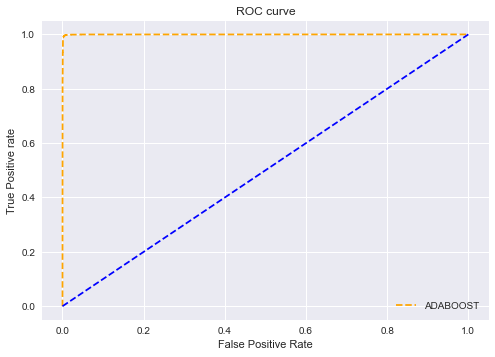

In [187]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='ADABOOST')
plt.plot(p_fpr6, p_tpr6, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### DecisionTree

In [188]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,Y_train)
y_pred5 = dt.predict(X_test)

In [189]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred5))

Accuracy score of the test data :  0.995879732739421


In [190]:
print('Precision = ', precision_score(y_pred5, Y_test))
print('Recall = ', recall_score(y_pred5, Y_test))
print('f1_score = ', f1_score(y_pred5, Y_test))

Precision =  0.9961669505962522
Recall =  0.9959548648073239
f1_score =  0.996060896412222


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree ')

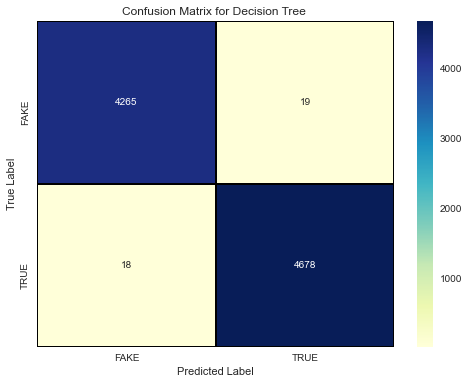

In [191]:
cm = confusion_matrix(Y_test,y_pred5)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "YlGnBu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree ')

In [192]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr7, p_tpr7, _ = roc_curve(Y_test, random_probs, pos_label=1)

pred_prob7 = dt.predict_proba(X_test)

fpr7, tpr7, thresh7 = roc_curve(Y_test, pred_prob7[:,1], pos_label=1)
# auc scores
auc_score7 = roc_auc_score(Y_test, pred_prob7[:,1])
print(auc_score7)

0.9958659216099841


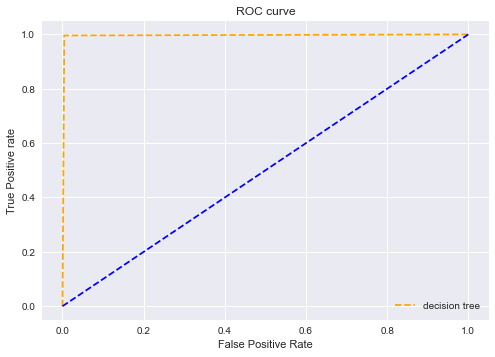

In [193]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr7, tpr7, linestyle='--',color='orange', label='decision tree')

plt.plot(p_fpr7, p_tpr7, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### KNN

In [194]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [195]:
y_pred6 = classifier.predict(X_test)

In [196]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred6))

Accuracy score of the test data :  0.9004454342984409


In [197]:
print('Precision = ', precision_score(y_pred6, Y_test))
print('Recall = ', recall_score(y_pred6, Y_test))
print('f1_score = ', f1_score(y_pred6, Y_test))

Precision =  0.8368824531516184
Recall =  0.968457368161656
f1_score =  0.8978752570253598


Text(0.5, 1.0, 'Confusion Matrix for KNN ')

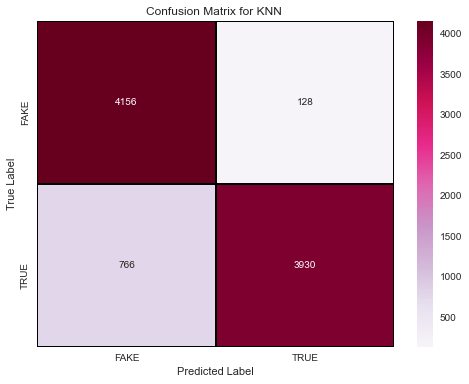

In [198]:
cm = confusion_matrix(Y_test,y_pred6)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "PuRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN ')

In [199]:
pred_prob9 = classifier.predict_proba(X_test)


fpr9, tpr9, thresh9 = roc_curve(Y_test, pred_prob9[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr9, p_tpr9, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
auc_score9 = roc_auc_score(Y_test, pred_prob9[:,1])
print(auc_score9)

0.9691382657549106


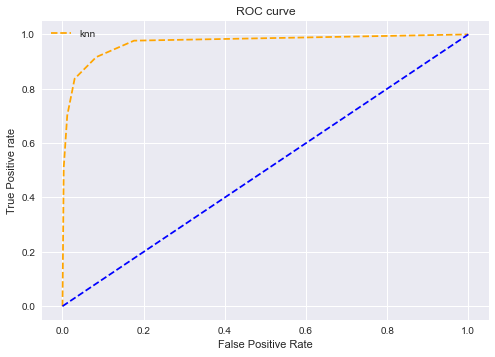

In [200]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr9, tpr9, linestyle='--',color='orange', label='knn')

plt.plot(p_fpr9, p_tpr9, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

#### A Comparison of Algorithms with HashingVectorizer()

In [201]:
Logistic_Regression =roc_auc_score(Y_test, X_test_prediction)
Random_Forest =roc_auc_score(Y_test, y_predection)
XGBOOST =roc_auc_score(Y_test, tfidf_val_predict)
SVM =roc_auc_score(Y_test, y_pred2)
#Naive_Bayes =roc_auc_score(Y_test, predictions)
ADABOOST =roc_auc_score(Y_test, y_pred4)
Dt =roc_auc_score(Y_test, y_pred5)
knn= roc_auc_score(Y_test,y_pred6)

In [202]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]
x.add_row(["Logistic_Regression Algorithm", round(Logistic_Regression,4)])
x.add_row(["Random_Forest Algorithm", round(Random_Forest,4)])
x.add_row(["XGBOOST Algorithm", round(XGBOOST,4)])
x.add_row(["SVM Algorithm", round(SVM,4)])
#x.add_row(["Naive_Bayes Algorithm ", round(Naive_Bayes,4)])
x.add_row(["ADABOOST Algorithm", round(ADABOOST,4)])
x.add_row(["Dt Algorithm", round(Dt,4)])
x.add_row(["knn Algorithm", round(knn,4)])

print(x)
print('\n')



Comparison of all algorithm results
+-------------------------------+----------+
|             Model             | Accuracy |
+-------------------------------+----------+
| Logistic_Regression Algorithm |  0.9896  |
|    Random_Forest Algorithm    |  0.9826  |
|       XGBOOST Algorithm       |  0.9976  |
|         SVM Algorithm         |  0.9951  |
|       ADABOOST Algorithm      |  0.9955  |
|          Dt Algorithm         |  0.9959  |
|         knn Algorithm         |  0.9035  |
+-------------------------------+----------+




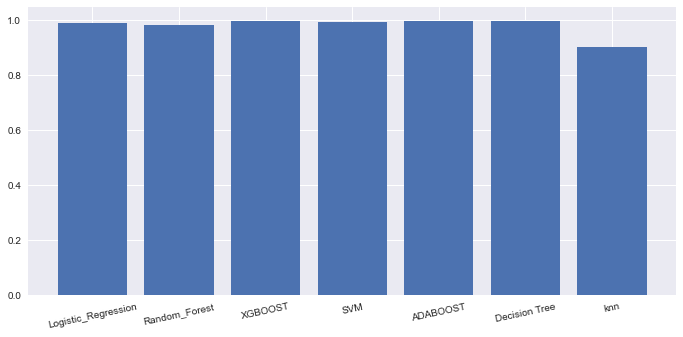

In [203]:
fig = plt.figure(figsize=(9,4))
ax = fig.add_axes([0,0,1,1])

models = ['Logistic_Regression', 'Random_Forest', 'XGBOOST', 'SVM',  'ADABOOST', 'Decision Tree', 'knn']
acc = [Logistic_Regression, Random_Forest , XGBOOST,  SVM , ADABOOST ,Dt , knn]


plt.xticks(rotation=12)
ax.bar(models,acc)
plt.show()

In [204]:
# calculate ROC curves
lgr_fpr, lgr_tpr, _ = roc_curve(Y_test, X_test_prediction)
rdf_fpr, rdf_tpr, _ = roc_curve(Y_test, y_predection)
xgb_fpr, xgb_tpr, _ = roc_curve(Y_test, tfidf_val_predict)
svm_fpr, svm_tpr, _ = roc_curve(Y_test, y_pred2)
#nb_fpr, nb_tpr, _ = roc_curve(Y_test, predictions)
ada_fpr, ada_tpr, _ = roc_curve(Y_test, y_pred4)
dt_fpr, dt_tpr, _ = roc_curve(Y_test, y_pred5)
knn_fpr, knn_tpr, _ = roc_curve(Y_test,y_pred6)

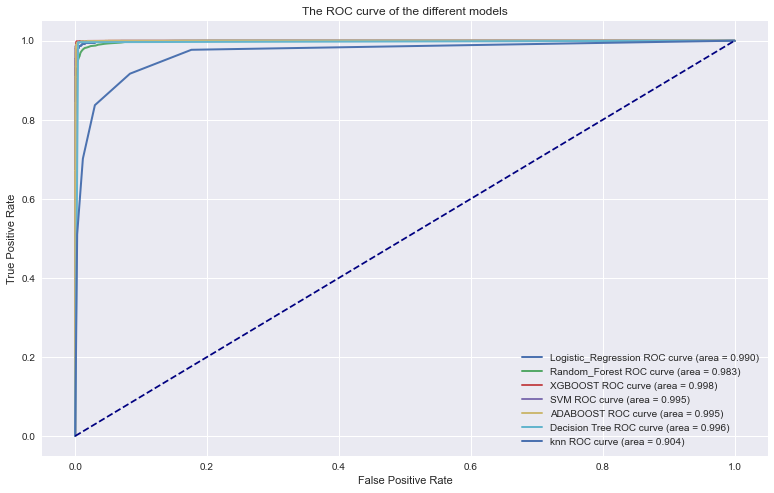

In [205]:
lw =2
plt.figure(figsize = (13,8))
plt.plot(fpr1, tpr1, lw = lw, label='Logistic_Regression ROC curve (area = %0.3f)' % Logistic_Regression)
plt.plot(fpr2, tpr2, lw = lw, label='Random_Forest ROC curve (area = %0.3f)' % Random_Forest)
plt.plot(fpr3, tpr3,  lw = lw, label='XGBOOST ROC curve (area = %0.3f)' % XGBOOST)
plt.plot(fpr4, tpr4, lw=lw,  label='SVM ROC curve (area = %0.3f)' % SVM)
#plt.plot(fpr5, tpr5,  lw = lw, label='Naive_Bayes ROC curve (area = %0.3f)' % Naive_Bayes)
plt.plot(fpr6, tpr6,  lw = lw, label='ADABOOST ROC curve (area = %0.3f)' % ADABOOST)
plt.plot(fpr7, tpr7, lw=lw,  label='Decision Tree ROC curve (area = %0.3f)' % Dt)
plt.plot(fpr9, tpr9,  lw = lw, label='knn ROC curve (area = %0.3f)' % knn)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('The ROC curve of the different models')
plt.legend()
plt.show()

### - Pipeline(CountVectorizer(), TfidfTransformer())

In [23]:
pipe = make_pipeline(CountVectorizer(), TfidfTransformer())
pipe.fit(X)
x = pipe.transform(X)


In [24]:
x.shape

(44898, 89868)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, stratify=Y, random_state=2)

### Logistic Regression

In [26]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)


LogisticRegression()

In [27]:
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9884187082405346


In [29]:
print('Precision = ', precision_score(X_test_prediction, Y_test))
print('Recall = ', recall_score(X_test_prediction, Y_test))
print('f1_score = ', f1_score(X_test_prediction, Y_test))

Precision =  0.9887137989778535
Recall =  0.9891350660417554
f1_score =  0.9889243876464323


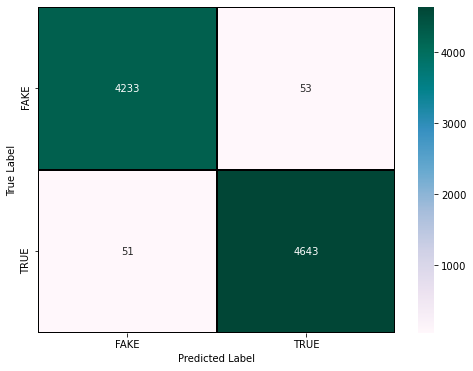

In [30]:
cm = confusion_matrix(X_test_prediction, Y_test)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "PuBuGn", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion matrix for logistic regression pipline ',dpi=300)

In [31]:
# logistic regression
model1 = LogisticRegression()
# fit model
model1.fit(X_train, Y_train)
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr1, p_tpr1, _ = roc_curve(Y_test, random_probs, pos_label=1)

In [32]:
# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
print(auc_score1)

0.9988611997893989


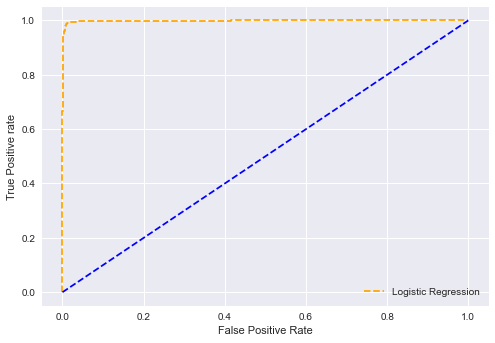

In [33]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr1, p_tpr1, linestyle='--', color='blue')
# title
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC  of logistic regression  pipline',dpi=300)
plt.show();

### Random Forest

In [34]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
y_predection=clf.predict(X_test)

In [35]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_predection))

Accuracy score of the test data :  0.994543429844098


In [36]:
print('Precision = ', precision_score(y_predection, Y_test))
print('Recall = ', recall_score(y_predection, Y_test))
print('f1_score = ', f1_score(y_predection, Y_test))

Precision =  0.9955281090289608
Recall =  0.9940463533914523
f1_score =  0.9947866794339822


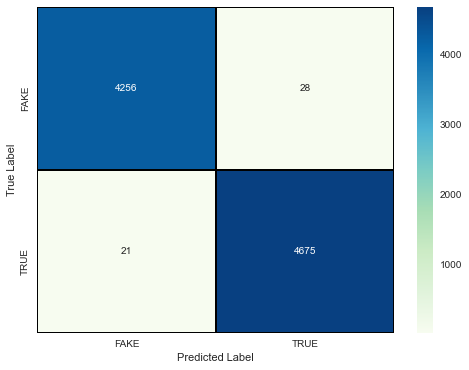

In [37]:
cm = confusion_matrix(Y_test,y_predection)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "GnBu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.savefig('confusion matrix for random forest pipline',dpi=300)

In [38]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr2, p_tpr2, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob2 = clf.predict_proba(X_test)


fpr2, tpr2, thresh1 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
# auc scores
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])
print(auc_score2)

0.9997447019693738


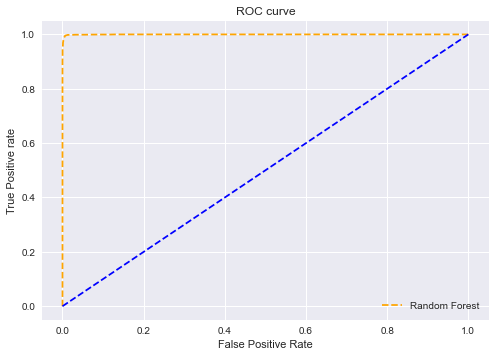

In [39]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr2, p_tpr2, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('roc of random forest ',dpi=300)

plt.show();

### XGBoost

In [40]:
xgb = XGBClassifier()
tfidf = xgb.fit(X_train,Y_train)
tfidf_val_predict = tfidf.predict( X_test)

C:\Users\ASUS1\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:14:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
print('Accuracy score of the test data : ',accuracy_score(Y_test, tfidf_val_predict))

Accuracy score of the test data :  0.9979955456570155


In [42]:
print('Precision = ', precision_score(tfidf_val_predict, Y_test))
print('Recall = ', recall_score(tfidf_val_predict, Y_test))
print('f1_score = ', f1_score(tfidf_val_predict, Y_test))

Precision =  0.9982964224872232
Recall =  0.9978714346530438
f1_score =  0.9980838833297849


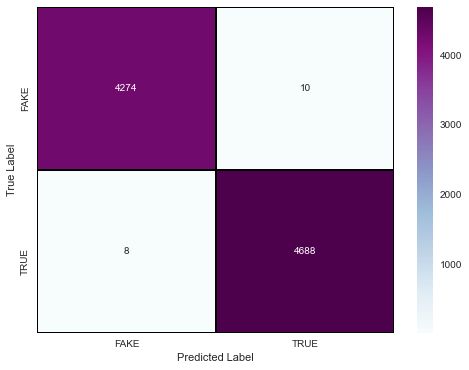

In [43]:
cm = confusion_matrix(Y_test, tfidf_val_predict)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "BuPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confision matrix for XGBoost pipline',dpi=300)

In [44]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr3, p_tpr3, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob3 = xgb.predict_proba(X_test)

fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)
# auc scores
auc_score3 = roc_auc_score(Y_test, pred_prob3[:,1])
print(auc_score3)

0.9998890527250082


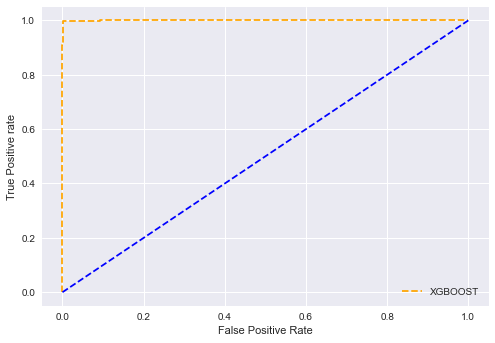

In [45]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr3, tpr3, linestyle='--',color='orange', label='XGBOOST')

plt.plot(p_fpr3, p_tpr3, linestyle='--', color='blue')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc of XGBOOST pipline ',dpi=300)
plt.show();

### SVM

In [46]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, Y_train)
y_pred2 = clf.predict(X_test)
SVM=metrics.accuracy_score(Y_test, y_pred2)

In [47]:
print('Accuracy score of the test data : ',accuracy_score(Y_test,y_pred2))

Accuracy score of the test data :  0.994097995545657


In [48]:
print('Precision = ', precision_score(y_pred2, Y_test))
print('Recall = ', recall_score(y_pred2, Y_test))
print('f1_score = ', f1_score(y_pred2, Y_test))

Precision =  0.9942504258943782
Recall =  0.9944621938232162
f1_score =  0.9943562985837504


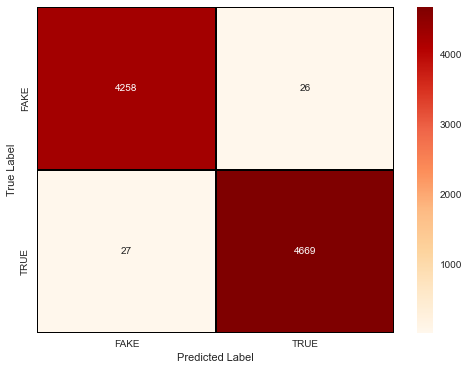

In [49]:
cm = confusion_matrix(Y_test,y_pred2)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "OrRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.savefig('confusion matrix for svm pipline',dpi=300)

In [50]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr4, p_tpr4, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob4 = clf.predict_proba(X_test)

fpr4, tpr4, thresh4 = roc_curve(Y_test, pred_prob4[:,1], pos_label=1)
# auc scores
auc_score4 = roc_auc_score(Y_test, pred_prob4[:,1])
print(auc_score4)

0.9997451741911985


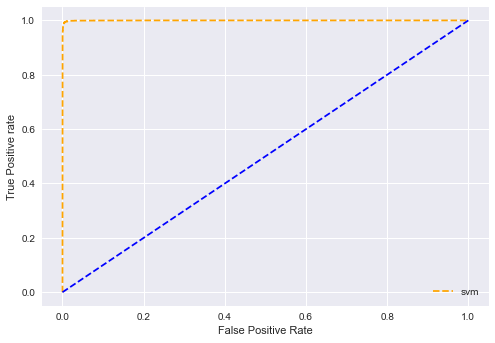

In [51]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr4, tpr4, linestyle='--',color='orange', label='svm')
plt.plot(p_fpr4, p_tpr4, linestyle='--', color='blue')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc  of svm pipline ',dpi=300)
plt.show();

### Naive Bayes

In [52]:
nb = MultinomialNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_test)

In [53]:
print('Accuracy score of the test data : ',accuracy_score(Y_test,predictions))

Accuracy score of the test data :  0.9317371937639198


In [54]:
print('Precision = ', precision_score(predictions, Y_test))
print('Recall = ', recall_score(predictions, Y_test))
print('f1_score = ', f1_score(predictions, Y_test))

Precision =  0.9476149914821125
Recall =  0.9238115009341914
f1_score =  0.9355618627141807


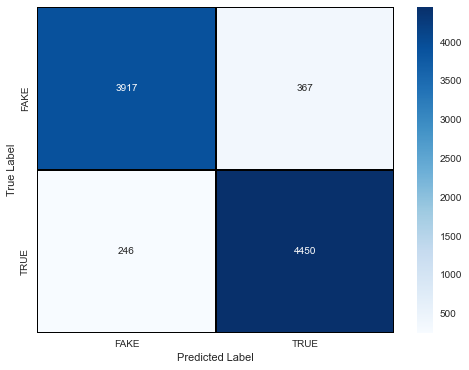

In [55]:
cm = confusion_matrix(Y_test, predictions)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion matrix for naive bayes pipline',dpi=300)

In [56]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr5, p_tpr5, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob5 = nb.predict_proba(X_test)

fpr5, tpr5, thresh5 = roc_curve(Y_test, pred_prob5[:,1], pos_label=1)
# auc scores
auc_score5 = roc_auc_score(Y_test, pred_prob5[:,1])
print(auc_score5)

0.9814768255399832


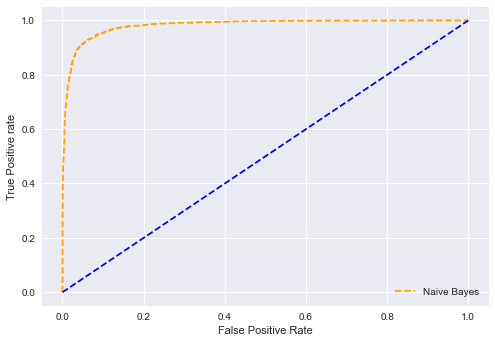

In [57]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr5, tpr5, linestyle='--',color='orange', label='Naive Bayes')

plt.plot(p_fpr5, p_tpr5, linestyle='--', color='blue')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc of naive bayes pipline ',dpi=300)
plt.show();

### ADABOOST

In [58]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model = abc.fit(X_train, Y_train)
y_pred4 = model.predict(X_test)

In [59]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred4))

Accuracy score of the test data :  0.9948775055679288


In [60]:
print('Precision = ', precision_score(y_pred4, Y_test))
print('Recall = ', recall_score(y_pred4, Y_test))
print('f1_score = ', f1_score(y_pred4, Y_test))

Precision =  0.9951022146507666
Recall =  0.9951022146507666
f1_score =  0.9951022146507666


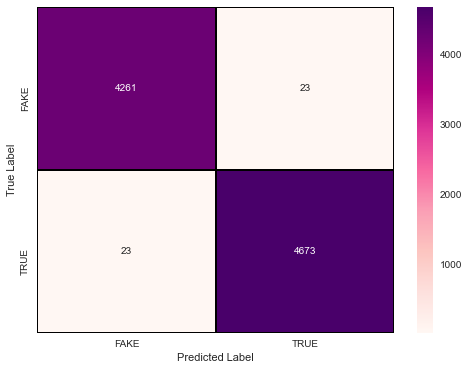

In [61]:
cm = confusion_matrix(Y_test,y_pred4)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "RdPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion matrix for adaboost pipline',dpi=300)

In [62]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr6, p_tpr6, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob6 = abc.predict_proba(X_test)

fpr6, tpr6, thresh6 = roc_curve(Y_test, pred_prob6[:,1], pos_label=1)
from sklearn.metrics import roc_auc_score
# auc scores
auc_score6 = roc_auc_score(Y_test, pred_prob6[:,1])
print(auc_score6)


0.9994972577333034


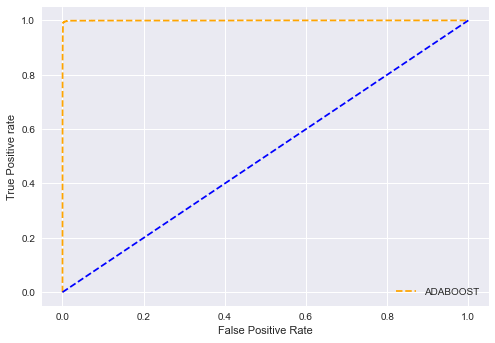

In [63]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='ADABOOST')
plt.plot(p_fpr6, p_tpr6, linestyle='--', color='blue')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc of adaboost pipline',dpi=300)
plt.show();

### Decision Tree


In [64]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,Y_train)
y_pred5 = dt.predict(X_test)

In [65]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred5))

Accuracy score of the test data :  0.9965478841870824


In [66]:
print('Precision = ', precision_score(y_pred5, Y_test))
print('Recall = ', recall_score(y_pred5, Y_test))
print('f1_score = ', f1_score(y_pred5, Y_test))

Precision =  0.9985093696763203
Recall =  0.9949077021005729
f1_score =  0.9967052821766393


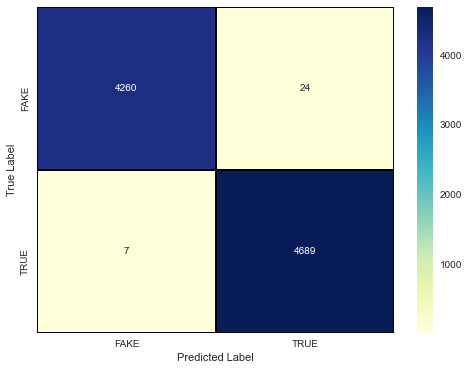

In [67]:
cm = confusion_matrix(Y_test,y_pred5)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "YlGnBu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion matrix for decision tree pipline',dpi=300)

In [68]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr7, p_tpr7, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob7 = dt.predict_proba(X_test)

fpr7, tpr7, thresh7 = roc_curve(Y_test, pred_prob7[:,1], pos_label=1)
from sklearn.metrics import roc_auc_score
# auc scores
auc_score7 = roc_auc_score(Y_test, pred_prob7[:,1])
print(auc_score7)


0.9964535643899809


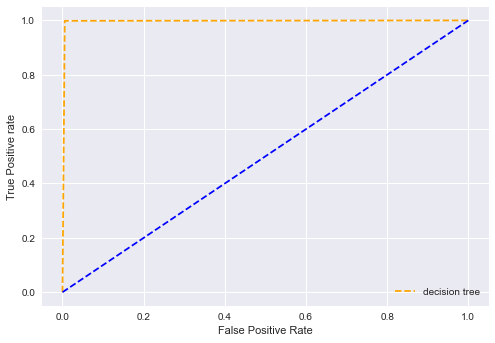

In [69]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr7, tpr7, linestyle='--',color='orange', label='decision tree')

plt.plot(p_fpr7, p_tpr7, linestyle='--', color='blue')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc  of decision tree pipline ',dpi=300)
plt.show();

### KNN

In [70]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, Y_train)
y_pred6 = classifier.predict(X_test)

In [71]:
print('Accuracy score of the test data : ',metrics.accuracy_score(Y_test, y_pred6))

Accuracy score of the test data :  0.8742761692650334


In [72]:
print('Precision = ', precision_score(y_pred6, Y_test))
print('Recall = ', recall_score(y_pred6, Y_test))
print('f1_score = ', f1_score(y_pred6, Y_test))

Precision =  0.8179301533219762
Recall =  0.9334143377885784
f1_score =  0.8718647145613438


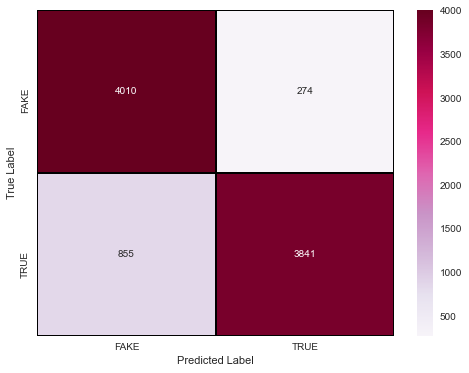

In [73]:
cm = confusion_matrix(Y_test,y_pred6)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "PuRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion matrix for knn pipline',dpi=300)

In [74]:
pred_prob9 = classifier.predict_proba(X_test)
fpr9, tpr9, thresh9 = roc_curve(Y_test, pred_prob9[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr9, p_tpr9, _ = roc_curve(Y_test, random_probs, pos_label=1)
# auc scores
auc_score9 = roc_auc_score(Y_test, pred_prob9[:,1])
print(auc_score9)

0.9491266729576555


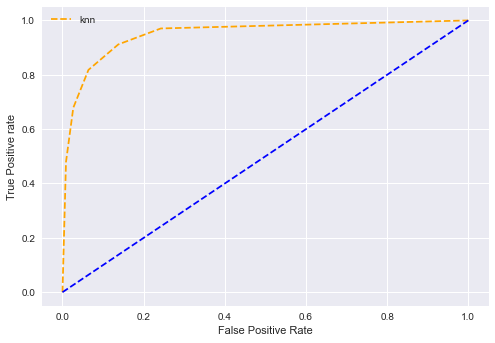

In [75]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr9, tpr9, linestyle='--',color='orange', label='knn')

plt.plot(p_fpr9, p_tpr9, linestyle='--', color='blue')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc of knn pipline ',dpi=300)
plt.show();

In [76]:
pip install PrettyTable

In [77]:
Logistic_Regression =roc_auc_score(Y_test, X_test_prediction)
Random_Forest =roc_auc_score(Y_test, y_predection)
XGBOOST =roc_auc_score(Y_test, tfidf_val_predict)
SVM =roc_auc_score(Y_test, y_pred2)
Naive_Bayes =roc_auc_score(Y_test, predictions)
ADABOOST =roc_auc_score(Y_test, y_pred4)
Dt =roc_auc_score(Y_test, y_pred5)
knn= roc_auc_score(Y_test,y_pred6)

In [78]:
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]
x.add_row(["Logistic_Regression Algorithm", round(Logistic_Regression,4)])
x.add_row(["Random_Forest Algorithm", round(Random_Forest,4)])
x.add_row(["XGBOOST Algorithm", round(XGBOOST,4)])
x.add_row(["SVM Algorithm", round(SVM,4)])
x.add_row(["Naive_Bayes Algorithm ", round(Naive_Bayes,4)])
x.add_row(["ADABOOST Algorithm", round(ADABOOST,4)])
x.add_row(["Dt Algorithm", round(Dt,4)])
x.add_row(["knn Algorithm", round(knn,4)])

print(x)
print('\n')



Comparison of all algorithm results
+-------------------------------+----------+
|             Model             | Accuracy |
+-------------------------------+----------+
| Logistic_Regression Algorithm |  0.9884  |
|    Random_Forest Algorithm    |  0.9945  |
|       XGBOOST Algorithm       |  0.998   |
|         SVM Algorithm         |  0.9941  |
|     Naive_Bayes Algorithm     |  0.931   |
|       ADABOOST Algorithm      |  0.9949  |
|          Dt Algorithm         |  0.9965  |
|         knn Algorithm         |  0.877   |
+-------------------------------+----------+




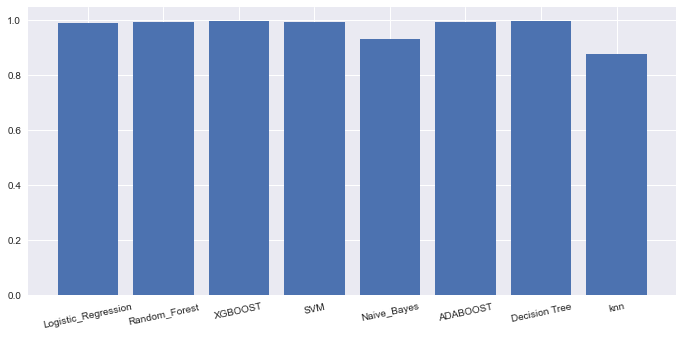

In [79]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,4))
ax = fig.add_axes([0,0,1,1])
models = ['Logistic_Regression', 'Random_Forest', 'XGBOOST', 'SVM', 'Naive_Bayes', 'ADABOOST', 'Decision Tree', 'knn']
acc = [Logistic_Regression, Random_Forest , XGBOOST,  SVM , Naive_Bayes,ADABOOST ,Dt , knn]
plt.xticks(rotation=12)
plt.savefig('pipline',dpi=300)

ax.bar(models,acc)
plt.show()

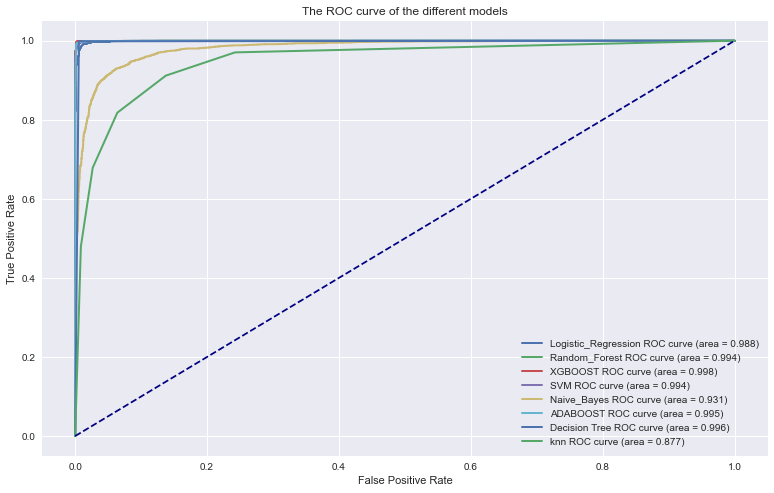

In [80]:
lw =2
plt.figure(figsize = (13,8))
plt.plot(fpr1, tpr1, lw = lw, label='Logistic_Regression ROC curve (area = %0.3f)' % Logistic_Regression)
plt.plot(fpr2, tpr2, lw = lw, label='Random_Forest ROC curve (area = %0.3f)' % Random_Forest)
plt.plot(fpr3, tpr3,  lw = lw, label='XGBOOST ROC curve (area = %0.3f)' % XGBOOST)
plt.plot(fpr4, tpr4, lw=lw,  label='SVM ROC curve (area = %0.3f)' % SVM)
plt.plot(fpr5, tpr5,  lw = lw, label='Naive_Bayes ROC curve (area = %0.3f)' % Naive_Bayes)
plt.plot(fpr6, tpr6,  lw = lw, label='ADABOOST ROC curve (area = %0.3f)' % ADABOOST)
plt.plot(fpr7, tpr7, lw=lw,  label='Decision Tree ROC curve (area = %0.3f)' % Dt)
plt.plot(fpr9, tpr9,  lw = lw, label='knn ROC curve (area = %0.3f)' % knn)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('The ROC curve of the different models')
plt.savefig('roc curve comapaison pipline',dpi=300)
plt.legend()
plt.show()